# Intro to AI - Lab 1
## Author: Amir Mohseni
## Student ID: i6356969

# Rule-Based Prediction

##  Import Libraries and Load the Data
Firstly, we read the data and load them into dataframes.

In [2]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Load the datasets
train_data = pd.read_csv('./set2_500_patients.csv')
test_data = pd.read_excel('./set3_500_patients.xlsx')

## Define the Rule-Based Prediction Function
Using some estimates using recommended weights given by Chatgpt, we try to create a rule-based predictor. In this method, we assign weights to different factors that might have influence on our outcome. We usually want to make significant factors, more impactful. Therefore, we lower their threshold.

In [3]:
# Define a rule-based prediction function for heart attacks
def predict_heart_attack(row):
    risk_score = 0
    if row['hypertension'] > 0.8:
        risk_score += 1
    if row['smoker'] > 0.7:
        risk_score += 1
    if row['overweight'] > 0.7:
        risk_score += 1
    if row['family_history'] > 0.5:
        risk_score += 1
    if row['alertness'] < 0.5:
        risk_score += 1
    # Return True (heart attack) if risk score is greater than 2
    return risk_score > 2

## Apply the Prediction Function to the Training and Test Data

In [4]:
# Apply the rule-based model to the training and test data
train_data['predicted_heart_attack'] = train_data.apply(predict_heart_attack, axis=1)
test_data['predicted_heart_attack'] = test_data.apply(predict_heart_attack, axis=1)

# Display the first few rows to check the predictions
train_data[['heart_attack', 'predicted_heart_attack']].head()

,heart_attack,predicted_heart_attack
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


## Calculate the Accuracy on the Training Data

In [5]:
# Calculate the accuracy for the training data
train_accuracy = accuracy_score(train_data['heart_attack'], train_data['predicted_heart_attack'])

# Display the training accuracy
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

Training Accuracy: 87.69%


## Calculate the Accuracy on the Test Data

In [6]:
# Calculate the accuracy for the test data
test_accuracy = accuracy_score(test_data['heart_attack'], test_data['predicted_heart_attack'])

# Display the test accuracy
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 86.25%


The accuracy is quite good considering this is just a very simple rule-based approach. As we're going to see later, there is a high bias in the data. This might make our models accuracies unreliable.

# Logistic Regression Approach

# 1. Read the training data

Firstly, we need to read the data and set a datafame for it. Using the **pandas** library in python, we can do this. Then, we can also take a look at a few examples of how the dataframe looks to see if we need to change their formatting in any way.

In [ ]:
import pandas as pd

# Convert to df
df = pd.read_csv('/content/set2_500_patients.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,day,hour,action,alertness,hypertension,intoxication,heart_attack,accident,smoker,overweight,family_history,goof_ball,subject
0,0,0,0,coffee,1.394465,0.114070,0.0,False,False,0.671647,0.730691,0.322668,0.653565,0
1,1,0,1,sleep,0.774357,0.067966,0.0,False,False,0.671647,0.730691,0.322668,0.653565,0
2,2,0,2,sleep,1.281268,0.040496,0.0,False,False,0.671647,0.730691,0.322668,0.653565,0
3,3,0,3,sleep,1.123732,0.024128,0.0,False,False,0.671647,0.730691,0.322668,0.653565,0
4,4,0,4,sleep,1.247691,0.014376,0.0,False,False,0.671647,0.730691,0.322668,0.653565,0


# 2. Formatting the train data
Firstly, we have a column named "Unnamed: 0" which contains the index number for each row. Since we already have the indices for each row in our dataframe, we can just drop this column.

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

The action column, tries to map an action to each row, these actions are:
**Coffee, Sleep, Alcohol, Nothing, Work, Patient dead** which corespond to different states. Since, we want our model to use this data for prediction, we need to convert it to real numbers. For this instance, we convert them to unique numbers from 0 to 5 for each class. After mapping, we try to apply this mapping our dataframe.

In [ ]:
action_mapping = {
    'coffee': 0,
    'sleep': 1,
    'alcohol': 2,
    'nothing': 3,
    'work': 4,
    'patient died': 5
}

# Apply the mapping to the 'action' column
df['action'] = df['action'].map(action_mapping)


In our dataframe, the columns for accident and heart attack are booleans. If the person had a heart attack or an accident, the value would be **True** for the corresponding column, and if not, it would be **False**. To make predictions possible, we need to convert these numbers to 0 and 1.

**0: Negative**

**1: Positive**

In [ ]:
# Convert boolean columns to 0 and 1
boolean_columns = ['accident', 'heart_attack']
for col in boolean_columns:
  df[col] = df[col].apply(lambda x: 1 if x == True else 0)

In [ ]:
df.head()

,day,hour,action,alertness,hypertension,intoxication,heart_attack,accident,smoker,overweight,family_history,goof_ball,subject
0,0,0,0,1.394465,0.114070,0.0,0,0,0.671647,0.730691,0.322668,0.653565,0
1,0,1,1,0.774357,0.067966,0.0,0,0,0.671647,0.730691,0.322668,0.653565,0
2,0,2,1,1.281268,0.040496,0.0,0,0,0.671647,0.730691,0.322668,0.653565,0
3,0,3,1,1.123732,0.024128,0.0,0,0,0.671647,0.730691,0.322668,0.653565,0
4,0,4,1,1.247691,0.014376,0.0,0,0,0.671647,0.730691,0.322668,0.653565,0


# Reading the testing data

After training our models for predictions, now we need to test them on data that they were not trained on. To do so, we are using another dataset provided to us.
**Firstly, we try to load this data into a dataframe.**

In [ ]:
# Convert to df
test_df = pd.read_excel('/content/set3_500_patients.xlsx', engine='openpyxl')

## Formatting the test data

The test data is in the same format as the training data, therefore, we need to apply our formattings from training to this dataset as well.

In [ ]:
# Apply the mapping to the 'action' column
test_df['action'] = test_df['action'].map(action_mapping)

test_df = test_df.drop('Unnamed: 0', axis=1)

# Convert boolean columns to 0 and 1
boolean_columns = ['accident', 'heart_attack']
for col in boolean_columns:
  test_df[col] = test_df[col].apply(lambda x: 1 if x == True else 0)

In [ ]:
test_df['heart_attack'].unique()

array([0, 1])

## Separate features (X) and target variables (y)

After we formatted the data in our desired format, we need to seperate the features (X) from the target labels (y) we are trying to predict. To do so, we drop the columns heart attack and accident from the features and add them to another dataframe that we use for target labels.

In [ ]:
X_train = df.drop(['heart_attack', 'accident'], axis=1)
y_heart_attack = df['heart_attack']
y_accident = df['accident']

## Separate features (X) and target variable (y) for the test dataset

In [ ]:
X_test = test_df.drop(['heart_attack', 'accident'], axis=1)
y_heart_attack_test = test_df['heart_attack']
y_accident_test = test_df['accident']

# Training the model

## Training the model using Logistic Regression
Now, we can use the sklearn library, to use their models to train our model. For the inputs we need to first pick the number of iterations we need to do, and also as an optional parameter, we can set a random state to make the model use randomization when training, to eliminate possible biases coming from the positions of the training data. Afterwards, we give the training features and label and using the model.fit() function, we let the model start training.

## Train the model for heart_attack

Since we want to predict heart attacks and accidents, we use logistic regression models for each one.

In [ ]:
# Example using Logistic Regression for heart_attack
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model for heart_attack
model_heart_attack = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model_heart_attack.fit(X_train, y_heart_attack)

# Make predictions for heart_attack
predictions_heart_attack = model_heart_attack.predict(X_train)

Accuracy for heart_attack: 0.9989798439248397
Accuracy for accident: 0.9939342856727653


## Evaluate the model for heart_attack

Using the sklearn library, we check the accuracy of our model on the training data. We usually expect this number to be very significant ( >95%) since we used this data to fit our model.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_heart_attack = accuracy_score(y_heart_attack, predictions_heart_attack)
print(f"Accuracy for heart_attack: {accuracy_heart_attack}")

## Train the model for accident

In [ ]:
# Create a Logistic Regression model for accident
model_accident = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
model_accident.fit(X_train, y_accident)

# Make predictions for accident
predictions_accident = model_accident.predict(X_train)

## Evaluate the model for accident

In [ ]:
accuracy_accident = accuracy_score(y_accident, predictions_accident)
print(f"Accuracy for accident: {accuracy_accident}")

# Predicting the labels for the test data

In [ ]:
# Make predictions on the test dataset
heart_attack_predictions = model_accident.predict(X_test)
accident_predictions = model_heart_attack.predict(X_test)

In [ ]:
accuracy_accident = accuracy_score(y_accident_test, accident_predictions)
print(f"Accuracy for accident: {accuracy_accident}")

accuracy_heart_attack = accuracy_score(y_heart_attack_test, heart_attack_predictions)
print(f"Accuracy for heart_attack: {accuracy_heart_attack}")

Accuracy for accident: 0.9657260133401745
Accuracy for heart_attack: 0.9947782745730411


## Accuracy Analysis
The performance of the model on the test data is the following:

**For Heart Attack:** **96.57%**

**For Accident:** **99.47%**

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt

# Results

## Visualization using confusion matrix

Using confusion matrixes, we can visualize how our model performs. Since we try to improve accuracy, we want the number of **False Negatives (FN)** and **False Positives (FP)** to be as low as possible.

### Confusion Matrix for accident predictions

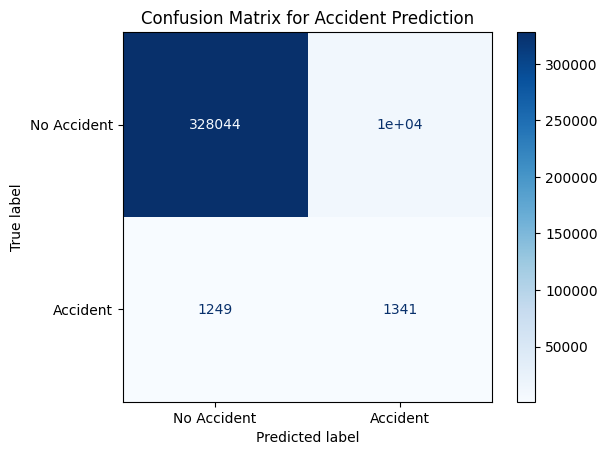

In [ ]:
cm_accident = confusion_matrix(y_accident_test, accident_predictions)
disp_accident = ConfusionMatrixDisplay(confusion_matrix=cm_accident, display_labels=['No Accident', 'Accident'])
disp_accident.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Accident Prediction')
plt.show()

### Confusion Matrix for heart attack predictions

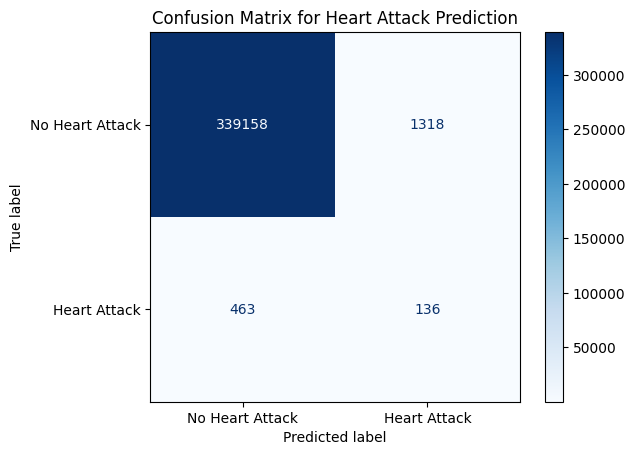

In [ ]:
cm_heart_attack = confusion_matrix(y_heart_attack_test, heart_attack_predictions)
disp_heart_attack = ConfusionMatrixDisplay(confusion_matrix=cm_heart_attack, display_labels=['No Heart Attack', 'Heart Attack'])
disp_heart_attack.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Heart Attack Prediction')
plt.show()

# Improving models generalizations
## Limitation:
Our model does remarkably good in accuracies. Usually, we don't expect our model to be able to get such a good accuracy on a seemingly dificult task. One observation that we can make is that, the number of No labeled **heart attack/accidents** are much more than the Yes labeled ones. This means that the model can perform extremely well by just outputing **No**. This is a potential bias in our data.

## Solution:
One way that we can address this issue, is to reduce the number of No labels in our training data, and therefore, making our model more prone to generalize.

Another approach would be to syntethically generate more Yes labeled data. [This approach does not work as well as the first approach based on the accuracies observed.]

## SMOTEENN Technique
**SMOTE (Synthetic Minority Oversampling Technique):**
   SMOTE generates synthetic samples for the minority class (the class with fewer instances) to make the dataset more balanced. It does this by selecting instances from the minority class and generating new synthetic instances along the line between two or more of the nearest neighbors of that instance.

**ENN (Edited Nearest Neighbors):**
   After applying SMOTE, ENN is used to clean the dataset by removing noisy or misclassified points. It works by removing examples that do not agree with the majority class of their nearest neighbors.

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=42)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_heart_attack)

In [ ]:
# Separate the majority and minority classes
X_train_no = X_train[y_heart_attack == 0]  # Subset where label is "No"
X_train_yes = X_train[y_heart_attack == 1]  # Subset where label is "Yes"

y_train_no = y_heart_attack[y_heart_attack == 0]
y_train_yes = y_heart_attack[y_heart_attack == 1]

In [ ]:
num_yes = len(y_train_yes)
print(num_yes)

596


We create all cases with a label "Yes" and we create 15 correspoding "No" labeled data for each one. This makes the "Yes" labeled data more significant than before.

In [ ]:
from sklearn.utils import shuffle

# Randomly sample from the majority class to match the number of "Yes" labels
X_train_no_sampled = X_train_no.sample(n=num_yes * 15, random_state=42)
y_train_no_sampled = y_train_no.sample(n=num_yes * 15, random_state=42)

# Concatenate the sampled majority class with the minority class
X_train_balanced = pd.concat([X_train_no_sampled, X_train_yes])
y_train_balanced = pd.concat([y_train_no_sampled, y_train_yes])

# Shuffle the dataset to mix the "Yes" and "No" labels
X_train_balanced, y_train_balanced = shuffle(X_train_balanced, y_train_balanced, random_state=42)

In [ ]:
# Example using Logistic Regression for heart_attack
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model for heart_attack
model_heart_attack = LogisticRegression(max_iter=10000, random_state=42)

# Train the model
model_heart_attack.fit(X_train_balanced, y_train_balanced)
y_probs = model_heart_attack.predict_proba(X_train_balanced)[:, 1]  # Probabilities for the positive class

# Make predictions for heart_attack
predictions_heart_attack = model_heart_attack.predict(X_train_balanced)

# Evaluate the model for heart_attack
from sklearn.metrics import accuracy_score
accuracy_heart_attack = accuracy_score(y_train_balanced, predictions_heart_attack)
print(f"Accuracy for heart_attack: {accuracy_heart_attack}")

Accuracy for heart_attack: 0.9972734899328859


# Final Visualizations

Finaly, our model learns to generalize much better than before and in addition, we reduced the rate of **False Negatives**. This means that when someone is expected to have a heart attack, we usually do pretty good, and we might sometimes be overconfident when saying Yes. This is much better than having a high **False Negative**.

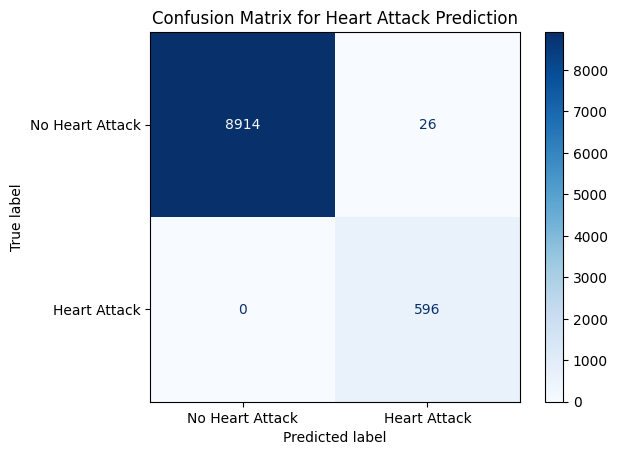

In [ ]:
# Confusion Matrix for heart attack predictions
cm_heart_attack = confusion_matrix(y_train_balanced, predictions_heart_attack)
disp_heart_attack = ConfusionMatrixDisplay(confusion_matrix=cm_heart_attack, display_labels=['No Heart Attack', 'Heart Attack'])
disp_heart_attack.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Heart Attack Prediction')
plt.show()

Now the model does pretty good on heart attack predictions whether the answer is Yes or No.

In [ ]:
# Make predictions on the test dataset
heart_attack_predictions = model_heart_attack.predict(X_test)

accuracy_heart_attack = accuracy_score(y_heart_attack_test, heart_attack_predictions)
print(f"Accuracy for heart_attack: {accuracy_heart_attack}")


Accuracy for heart_attack: 0.9948046617312908


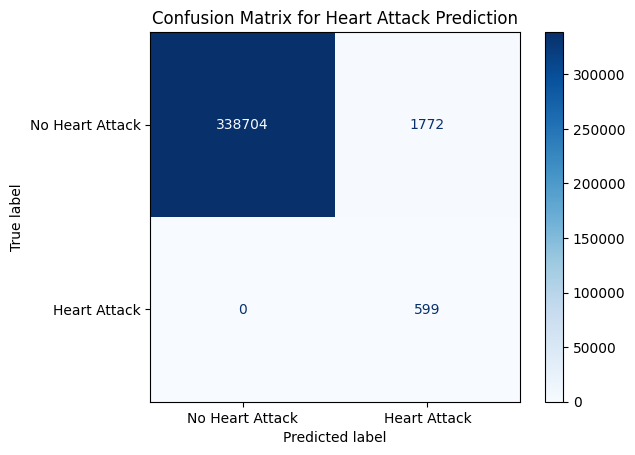

In [ ]:
# Confusion Matrix for heart attack predictions
cm_heart_attack = confusion_matrix(y_heart_attack_test, heart_attack_predictions)
disp_heart_attack = ConfusionMatrixDisplay(confusion_matrix=cm_heart_attack, display_labels=['No Heart Attack', 'Heart Attack'])
disp_heart_attack.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Heart Attack Prediction')
plt.show()

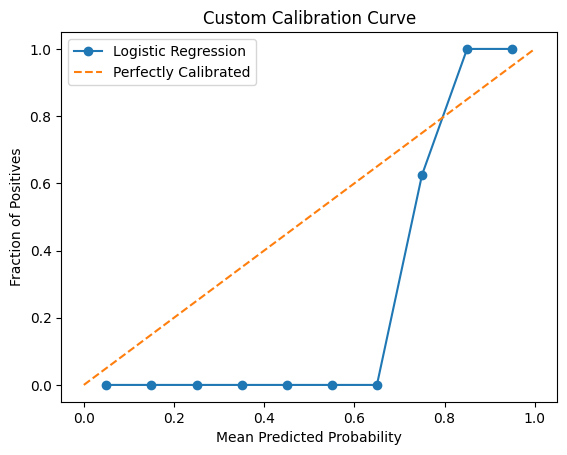

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def custom_calibration_curve(y_true, y_prob, n_bins=10):
    bins = np.linspace(0, 1, n_bins + 1)
    bin_centers = (bins[:-1] + bins[1:]) / 2
    bin_true = np.zeros(n_bins)
    bin_pred = np.zeros(n_bins)

    for i in range(n_bins):
        bin_mask = (y_prob >= bins[i]) & (y_prob < bins[i + 1])
        bin_true[i] = y_true[bin_mask].mean() if bin_mask.any() else 0
        bin_pred[i] = bin_centers[i]

    return bin_pred, bin_true

# Assuming y_train_balanced and y_probs have been defined
bin_pred, bin_true = custom_calibration_curve(y_train_balanced, y_probs)

plt.plot(bin_pred, bin_true, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Custom Calibration Curve')
plt.legend()
plt.show()